In [100]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing and modelling
# evaluate bagging ensemble for regression
# ------------------------------------------------------------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score





# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [70]:
# Data Loading


#training data
data_train = pd.read_csv('https://raw.githubusercontent.com/SantiagoArenas/MachineLearning/main/austinHousingData.csv')
data_train.head()



zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  ...  numOfMiddleSchools  \
0             1.98             2            True  ...                   1   
1             1.98             2            True  ...                   1   
2             1.98             0            True  ...                   1   
3             1.98             2            True  ...                   1   
4             1.98             0            True  ...                   1   

   numOfHighSchools  avgSchoolDistance  avgSchoolRating  avgSchoolSize  \
0                 1           1.266667         2.666667           1063   
1                 1           1.400000         2.666667           1063   
2                 1           1.200000         3.000000           1108   
3                 1           1.400000         2.666667           1063   
4                 1           1.133333         4.000000           1223   

  MedianStudentsPerTeacher  numOfBathrooms  numOfBedrooms  numOfStories  \
0                       14             3.0              4             2   
1                       14             2.0              4             1   
2                       14             2.0              3             1   
3                       14             2.0              3             1   
4                       14             3.0              3             2   

                                           homeImage  
0  111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...  
1  120900430_8255c127be8dcf0a1a18b7563d987088-p_f...  
2  2084491383_a2ad649e1a7a098111dcea084a11c855-p_...  
3  120901374_b469367a619da85b1f5ceb69b675d88e-p_f...  
4  60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg  

[5 rows x 47 columns]

In [71]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [72]:
# Columnas descartables de inicio
data_train = data_train.drop(["description","homeImage","zpid","streetAddress","latest_saledate","latestPriceSource", 'garageSpaces'], axis=1)
#Cogemos los datos que queremos
data_train = data_train[data_train['city'] == 'austin']
data_train = data_train[data_train['homeType'] == 'Single Family']
#Tiene los mismos valores siempre, entonces no aporta nada
data_train = data_train.drop(["city","homeType"], axis=1)
numeric_cols = data_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = data_train.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()
#Prefijos para las dummies
new_column_names = [
    'Dmy_association',
    'Dmy_cooling',
    'Dmy_garage',
    'Dmy_heating',
    'Dmy_spa',
    'Dmy_view'
]
data=pd.get_dummies(data_train, columns=cat_cols, prefix=new_column_names,drop_first=True, dtype= 'int64' ) 
print(data.dtypes)

zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSchools                int64
avgSchoolDistance             float64
avgSchoolRat

In [73]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "latestPrice"),
                                        data_train['latestPrice'],
                                        random_state = 123,
                                        test_size=0.2
                                    )


In [74]:
# Instantiate a random forest regressor object
rf = RandomForestRegressor(random_state=123)

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [75]:
# Instantiate a random forest regressor object
rf = RandomForestRegressor(random_state=123)

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}

In [76]:
# Perform nested cross-validation with grid search
outer_cv = KFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=123)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=inner_cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X=X_train, y=y_train) # Fit the GridSearchCV object on training data

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [77]:
# Extract the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final random forest regressor using the best hyperparameters
rf_best = RandomForestRegressor(random_state=123, **best_params)
rf_best.fit(X=X_train, y=y_train)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=15, n_estimators=300, random_state=123)

In [78]:
# create a random forest regression model with 100 trees
rf = RandomForestRegressor(max_depth=15, n_estimators=300, min_samples_split=2, random_state=123)

# train the model on the training data
rf.fit(X_train, y_train)

# make predictions on the test data
pred_train = rf.predict(X_train)

# evaluate the model performance using the mean squared error metric
friedman_mse = mean_squared_error(y_train, pred_train)
rfriedman_mse = np.sqrt(friedman_mse)
print('Root Mean Squared Error in traing:', rfriedman_mse)
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - pred_train) / y_train)) * 100), 2))
print('R2 Value in training:', round(metrics.r2_score(y_train, pred_train),2))


Root Mean Squared Error in traing: 106986.3772797297
Accuracy in training 87.62
R2 Value in training: 0.95


In [79]:
# make predictions on the test data
pred_test = rf.predict(X_test)

# evaluate the model performance using the mean squared error metric
friedman_mse = mean_squared_error(y_test, pred_test)
rfriedman_mse = np.sqrt(friedman_mse)
print('Root Mean Squared Error test:', rfriedman_mse)
print('Accuracy in training',round( 100- (np.mean(np.abs((y_test - pred_test) / y_test)) * 100), 2))
print('R2 Value in training:', round(metrics.r2_score(y_test, pred_test),2))


Root Mean Squared Error test: 198607.04338423972
Accuracy in training 58.86
R2 Value in training: 0.75


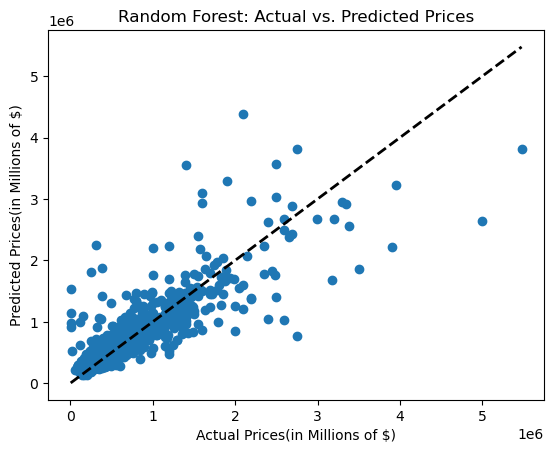

In [80]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual Prices(in Millions of $)')
plt.ylabel('Predicted Prices(in Millions of $)')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

Optimum value of max_features: 11


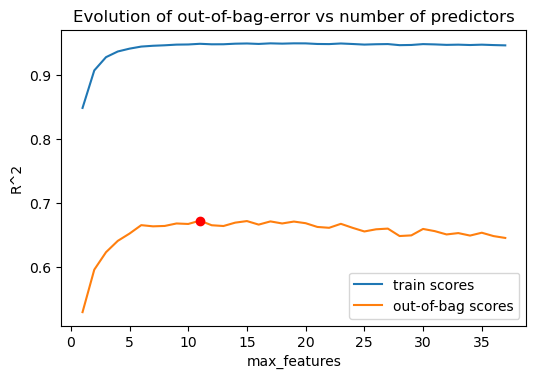

In [81]:
# Defining number of features to use based on Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestRegressor(
                n_estimators = 300,
                criterion    = 'friedman_mse',
                max_depth    = 15,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123, 
                min_samples_split=2
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolution of out-of-bag-error vs number of predictors")
plt.legend();
print(f"Optimum value of max_features: {max_features_range[np.argmax(oob_scores)]}")

Optimum value of minimum number of observations in leaves : 1


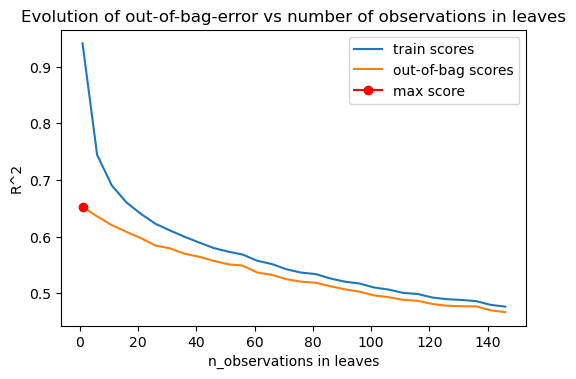

In [83]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model1 = RandomForestRegressor(
                n_estimators = 300,
                criterion    = 'friedman_mse',
                max_depth    = 15,
                max_features = 5,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123, 
                min_samples_split=2
             )
    model1.fit(X_train, y_train)
    train_scores.append(model1.score(X_train, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(obser_range, train_scores, label="train scores")
ax.plot(obser_range, oob_scores, label="out-of-bag scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_observations in leaves")
ax.set_title("Evolution of out-of-bag-error vs number of observations in leaves")
plt.legend();
print(f"Optimum value of minimum number of observations in leaves : {obser_range[np.argmax(oob_scores)]}")

Optimum value of predictors using cv: 1


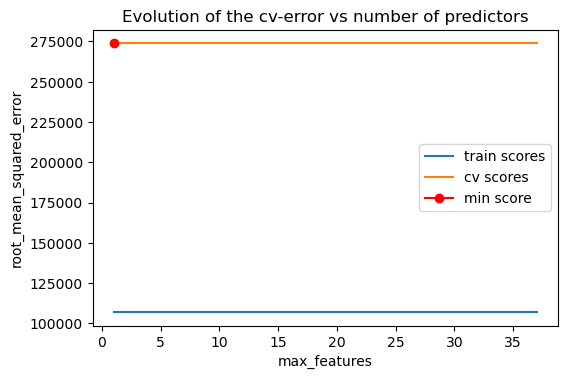

In [85]:
# Validation of number of predictors using k-cross-validation and neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features
# Training error and k-cross-validation error are obtained.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 300,
                criterion    = 'friedman_mse',
                max_depth    = 15,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123, 
                min_samples_split=2
             )
    
    # Train error
    model.fit(X_train, y_train)
    predictions = model.predict(X = X_train)
    latestPrice = mean_squared_error(
            y_true  = y_train,
            y_pred  = predictions,
            squared = False
           )
    train_scores.append(latestPrice)
    
    # kcross-validation error
    scores = cross_val_score(
                estimator = model,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # adding scores of cross_val_score() and sign change
    cv_scores.append(-1*scores.mean())
    
# Graphic with the evolution of the errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolution of the cv-error vs number of predictors")
plt.legend();
print(f"Optimum value of predictors using cv: {max_features_range[np.argmin(cv_scores)]}")

In [87]:
# Final  Model built
# ==============================================================================
rf_final = RandomForestRegressor(
            n_estimators = 300,  
            criterion    = 'friedman_mse',
            max_depth    = 15,
            max_features = 1,
            oob_score    = True,
            min_samples_leaf=1,
            n_jobs       = -1,
            random_state = 123, 
            min_samples_split=2
         )

# Entrenamiento del modelo
# ==============================================================================
rf_final.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=15, max_features=1,
                      n_estimators=300, n_jobs=-1, oob_score=True,
                      random_state=123)

In [112]:


# randomforest ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = rf_final.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


latestPrice = mean_squared_error(
        y_true  = y_train,
        y_pred  = prediction_train,
        squared = False
       )
print(f"MSE in train: {latestPrice}")

R2 Value in training: 0.85
Accuracy in training 76.01
MSE in train: 179328.95534538347


In [113]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = rf_final.predict(X = X_test)

print('R2 Value in test:', round(metrics.r2_score(y_test, prediction_test),2))

#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

latestPrice = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction_test,
        squared = False
       )
print(f"MSE in test: {latestPrice}")

R2 Value in test: 0.66
Accuracy in test 53.25
MSE in test: 230575.1299296574


In [91]:
importance_predictors = pd.DataFrame(
                            {'predictor': data_train.drop(columns = "latestPrice").columns,
                             'importance': rf_final.feature_importances_}
                            )
print("Importance of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance of the model predictors
-------------------------------------------


predictor  importance
25              livingAreaSqFt    0.117218
34              numOfBathrooms    0.110719
24                 lotSizeSqFt    0.082622
35               numOfBedrooms    0.052107
1                     latitude    0.051730
0                      zipcode    0.049515
2                    longitude    0.046914
32               avgSchoolSize    0.043407
11                   yearBuilt    0.042407
31             avgSchoolRating    0.041890
30           avgSchoolDistance    0.037994
15                 numOfPhotos    0.034697
10               parkingSpaces    0.030216
33    MedianStudentsPerTeacher    0.029682
17             numOfAppliances    0.023135
13            latest_salemonth    0.021832
12             numPriceChanges    0.021342
36                numOfStories    0.021129
18        numOfParkingFeatures    0.014058
4               hasAssociation    0.011903
8                       hasSpa    0.011516
14             latest_saleyear    0.011323
19  numOfPatioAndPorchFeatures    0.011319
29            numOfHighSchools    0.010431
20       numOfSecurityFeatures    0.009698
9                      hasView    0.009321
27      numOfElementarySchools    0.009236
26         numOfPrimarySchools    0.008091
3              propertyTaxRate    0.007851
6                    hasGarage    0.006065
22         numOfWindowFeatures    0.005987
21     numOfWaterfrontFeatures    0.005774
28          numOfMiddleSchools    0.005742
16  numOfAccessibilityFeatures    0.000982
5                   hasCooling    0.000901
23      numOfCommunityFeatures    0.000847
7                   hasHeating    0.000399

In [92]:
from sklearn.inspection import permutation_importance

importance_per = permutation_importance(
                estimator    = rf_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                #scoring      = 'neg_root_mean_squared_error',
                scoring     = 'r2',
                n_jobs       = - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importance = pd.DataFrame(
                    {k: importance_per[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importance['feature'] = X_train.columns
df_importance.sort_values('importances_mean', ascending=False)

importances_mean  importances_std                     feature
25          0.118771         0.000924              livingAreaSqFt
34          0.106804         0.002469              numOfBathrooms
24          0.083014         0.001796                 lotSizeSqFt
35          0.072987         0.001665               numOfBedrooms
0           0.067138         0.002739                     zipcode
1           0.062581         0.004251                    latitude
32          0.060830         0.004504               avgSchoolSize
31          0.056471         0.004314             avgSchoolRating
33          0.051936         0.006223    MedianStudentsPerTeacher
15          0.051101         0.002726                 numOfPhotos
11          0.047324         0.002550                   yearBuilt
2           0.047184         0.003436                   longitude
4           0.044254         0.009224              hasAssociation
13          0.041101         0.004672            latest_salemonth
14          0.040652         0.005831             latest_saleyear
30          0.038833         0.002413           avgSchoolDistance
12          0.037746         0.002716             numPriceChanges
10          0.037396         0.001030               parkingSpaces
17          0.036595         0.004053             numOfAppliances
36          0.034918         0.006137                numOfStories
9           0.034417         0.002457                     hasView
6           0.033383         0.004792                   hasGarage
19          0.024833         0.004129  numOfPatioAndPorchFeatures
18          0.024621         0.002466        numOfParkingFeatures
20          0.023008         0.002256       numOfSecurityFeatures
8           0.019244         0.001175                      hasSpa
29          0.018413         0.002400            numOfHighSchools
22          0.018076         0.007936         numOfWindowFeatures
26          0.017566         0.003327         numOfPrimarySchools
27          0.014741         0.000528      numOfElementarySchools
3           0.011820         0.001921             propertyTaxRate
28          0.005537         0.000607          numOfMiddleSchools
21          0.003828         0.000133     numOfWaterfrontFeatures
5           0.001309         0.000287                  hasCooling
16          0.001006         0.000120  numOfAccessibilityFeatures
23          0.000941         0.000224      numOfCommunityFeatures
7           0.000572         0.000146                  hasHeating

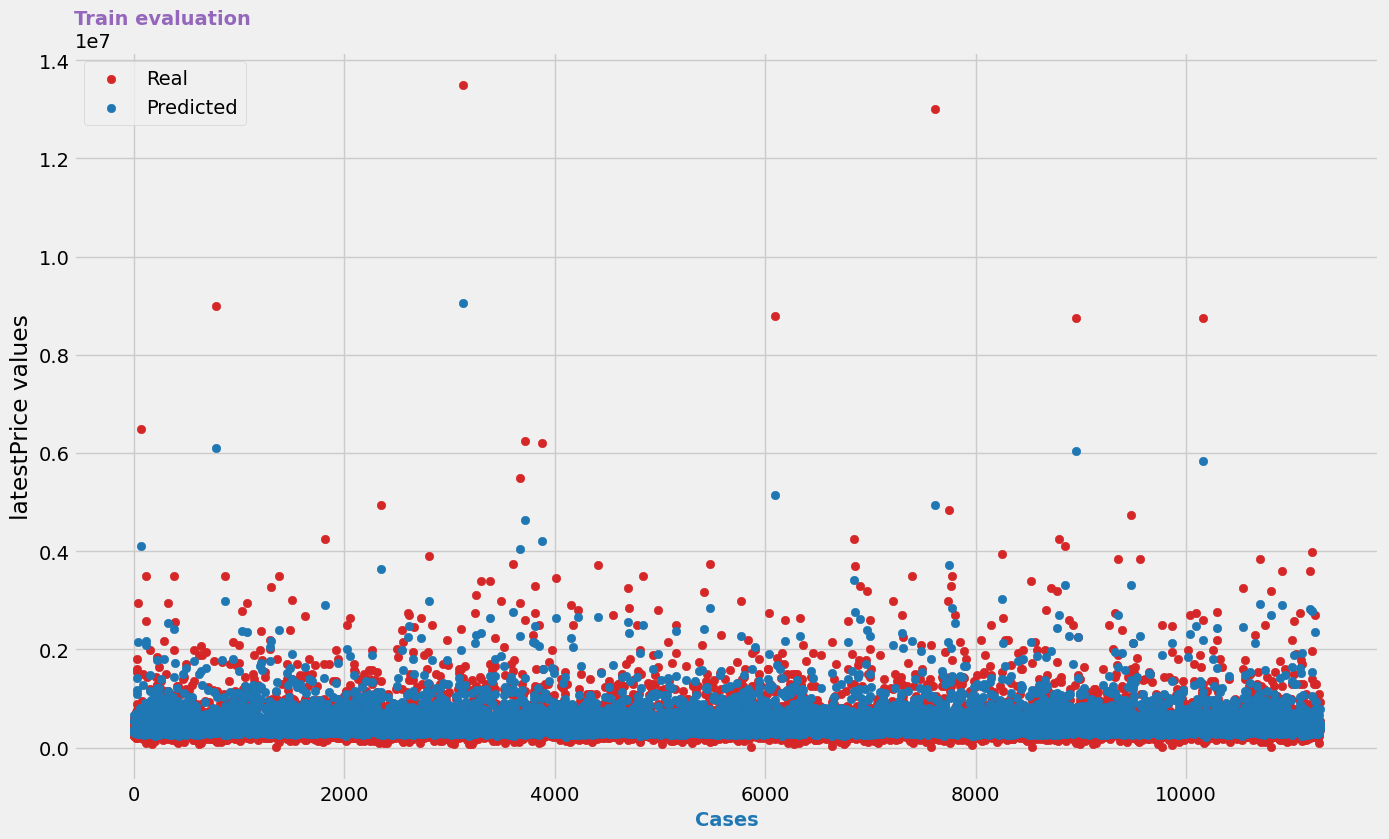

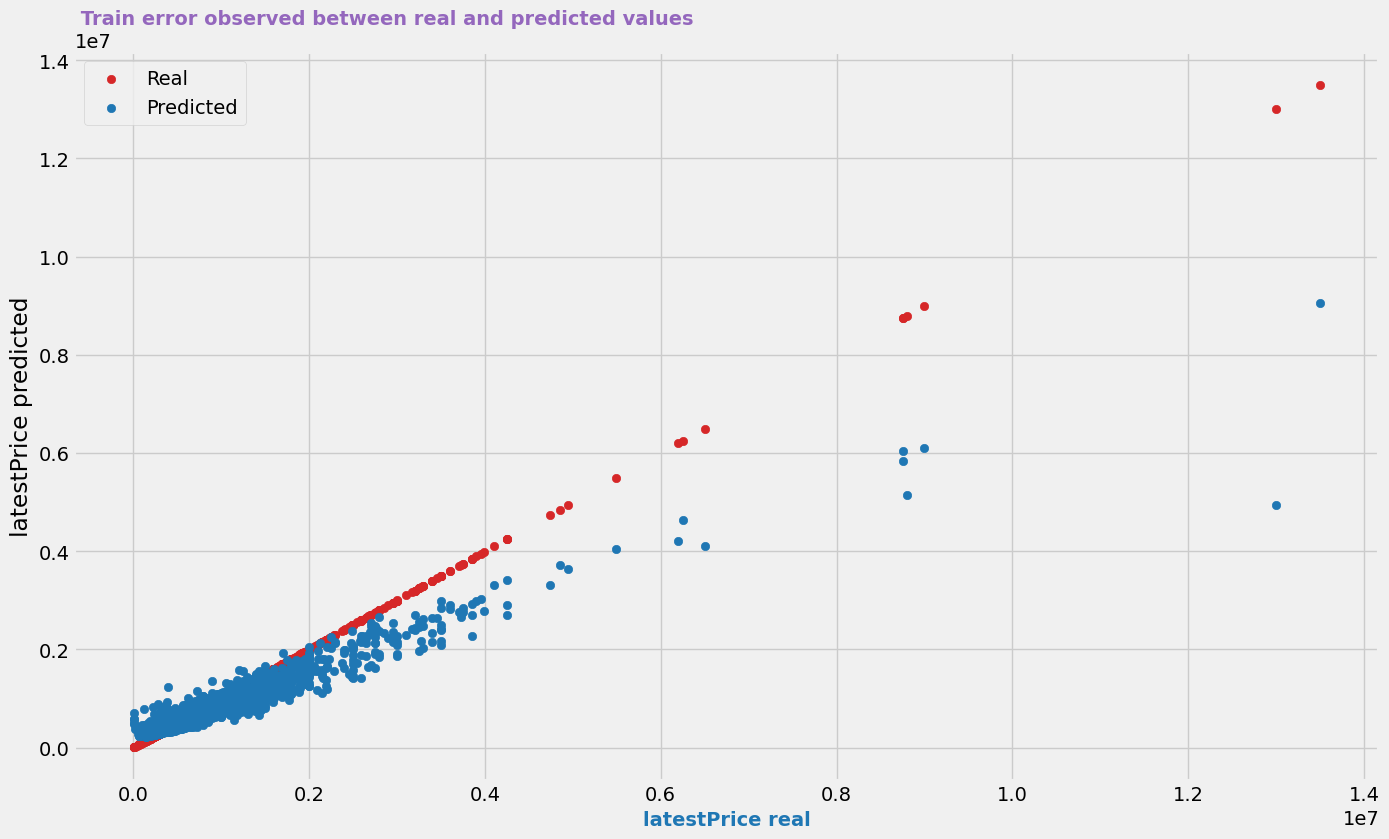

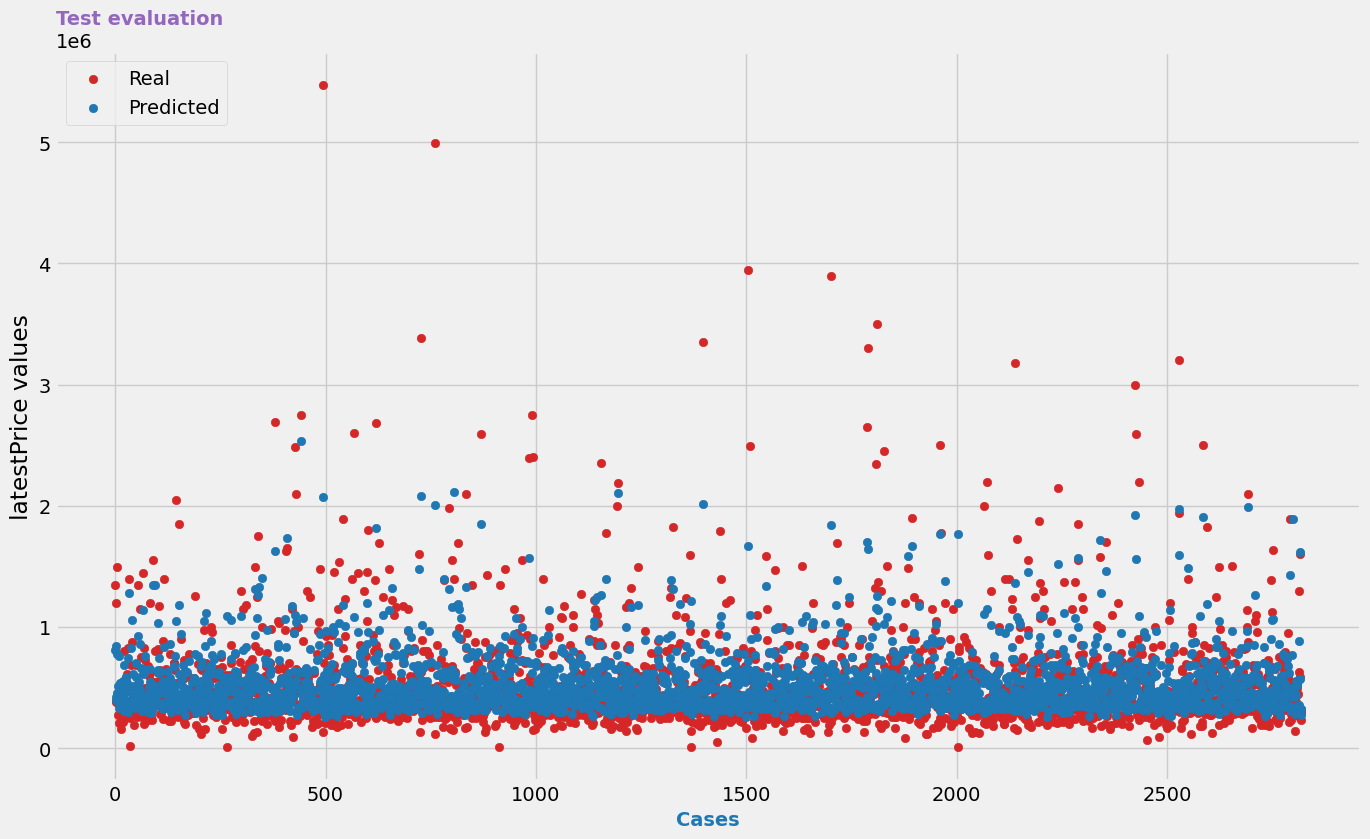

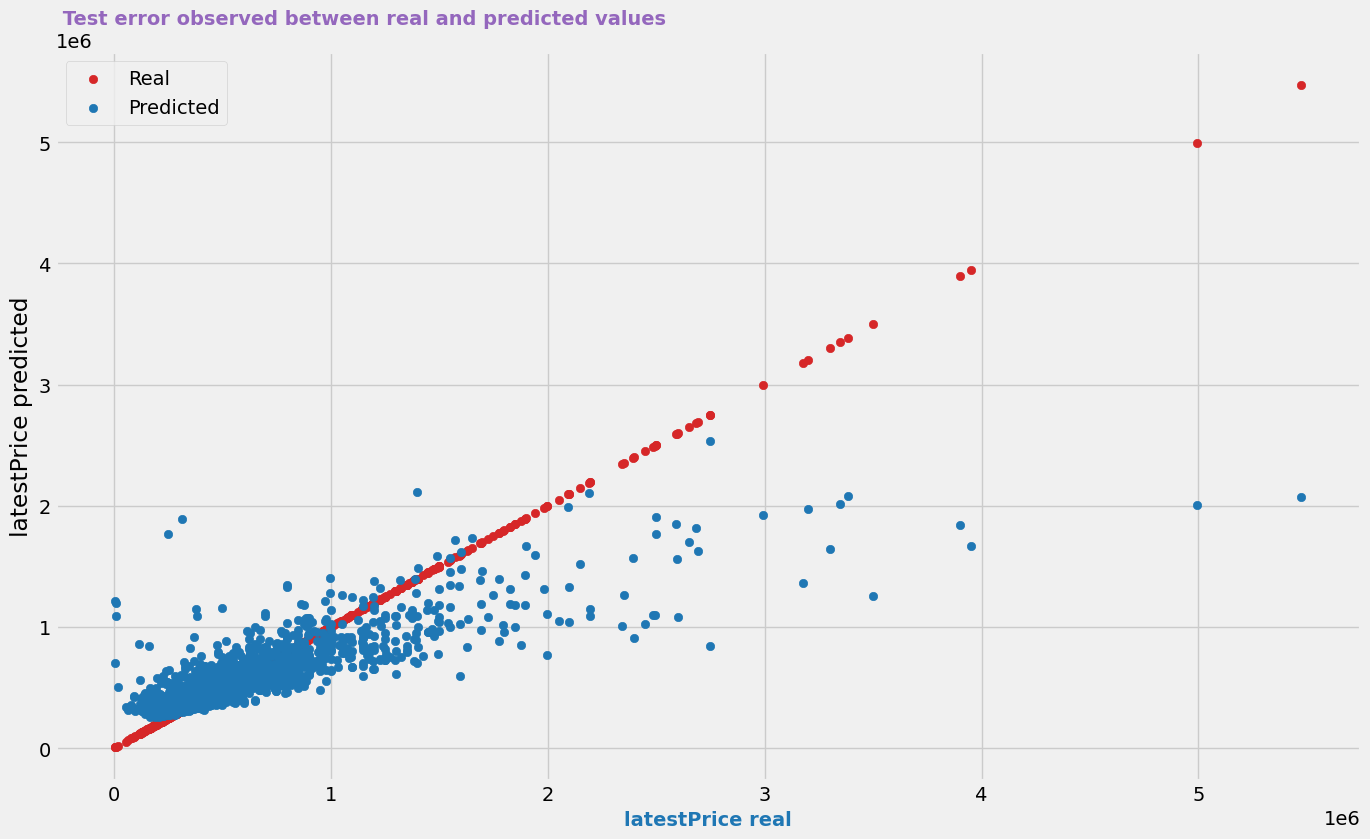

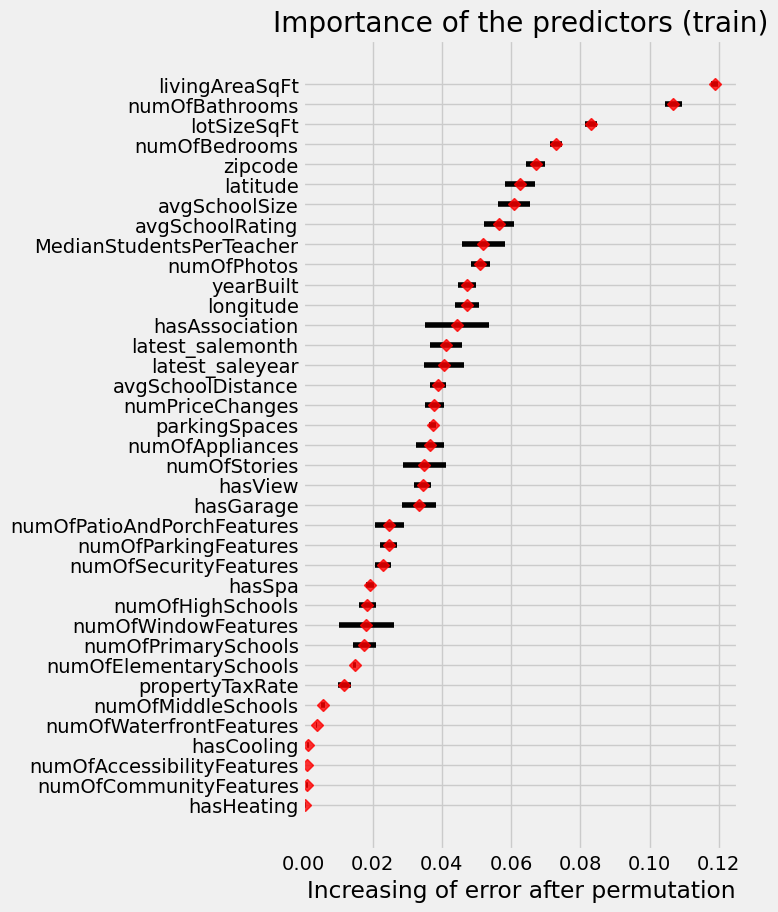

In [101]:
# Graphic
fig, ax = plt.subplots(figsize=(5, 10))
df_importance = df_importance.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importance['feature'],
    df_importance['importances_mean'],
    xerr=df_importance['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importance['importances_mean'],
    df_importance['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importance of the predictors (train)')
ax.set_xlabel('Increasing of error after permutation');

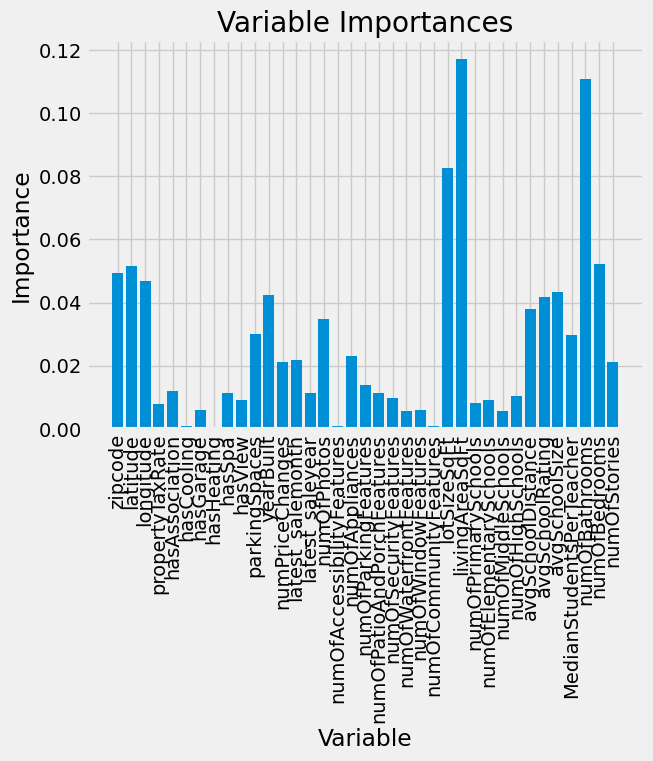

In [94]:
importances= rf_final.feature_importances_
feature_list = data_train.drop(columns = "latestPrice").columns

%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.187693 to fit


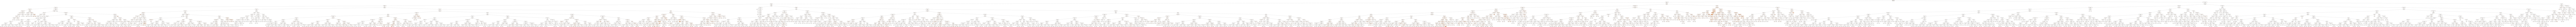

In [102]:
# Selecting any tree in the forest (Example 51)

from dmba import plotDecisionTree

plotDecisionTree(rf_final.estimators_[50], feature_names=list(data_train.drop(columns = "latestPrice").columns)) 
    



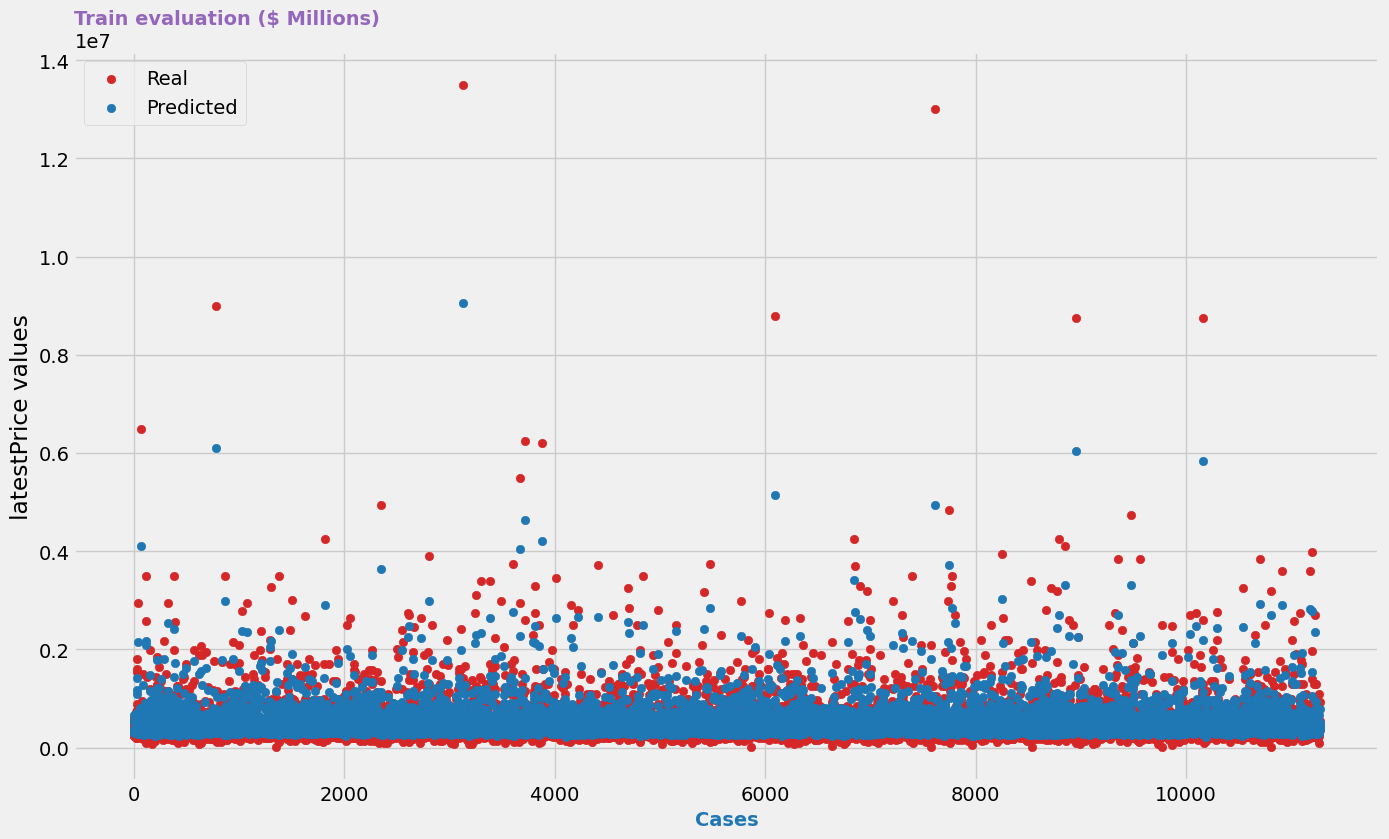

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice values")
ax.set_title('Train evaluation ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

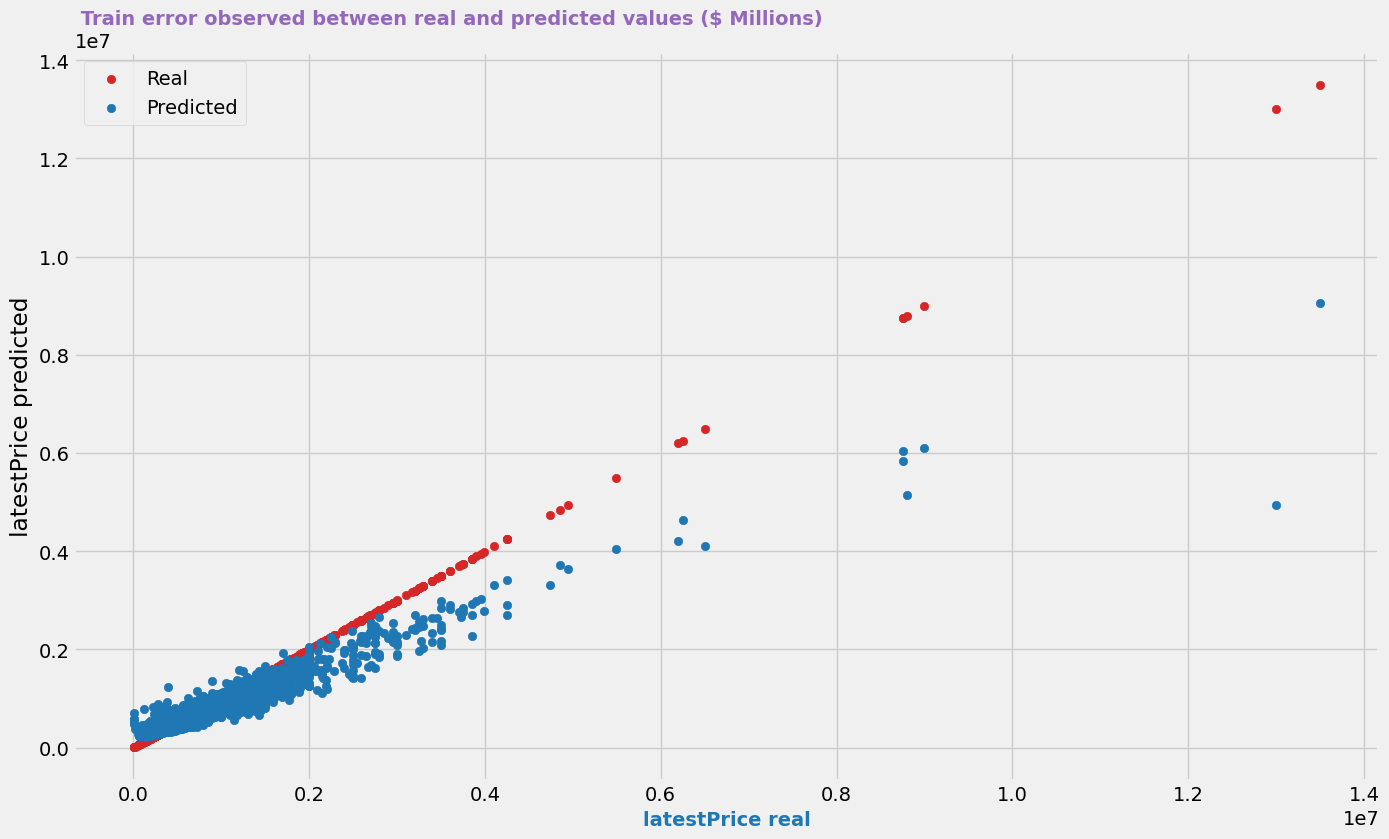

In [109]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice real", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice predicted")
ax.set_title(' Train error observed between real and predicted values ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

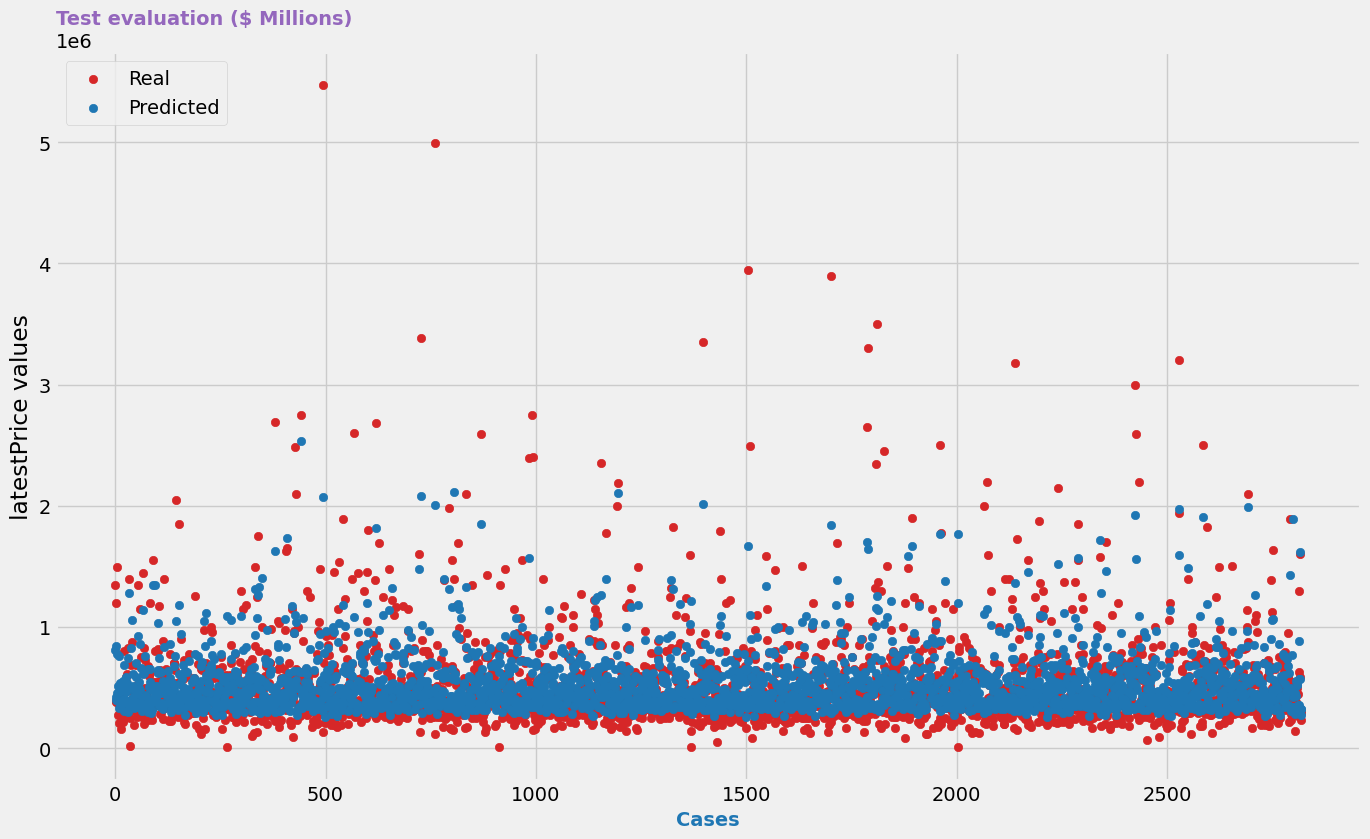

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice values")
ax.set_title('Test evaluation ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

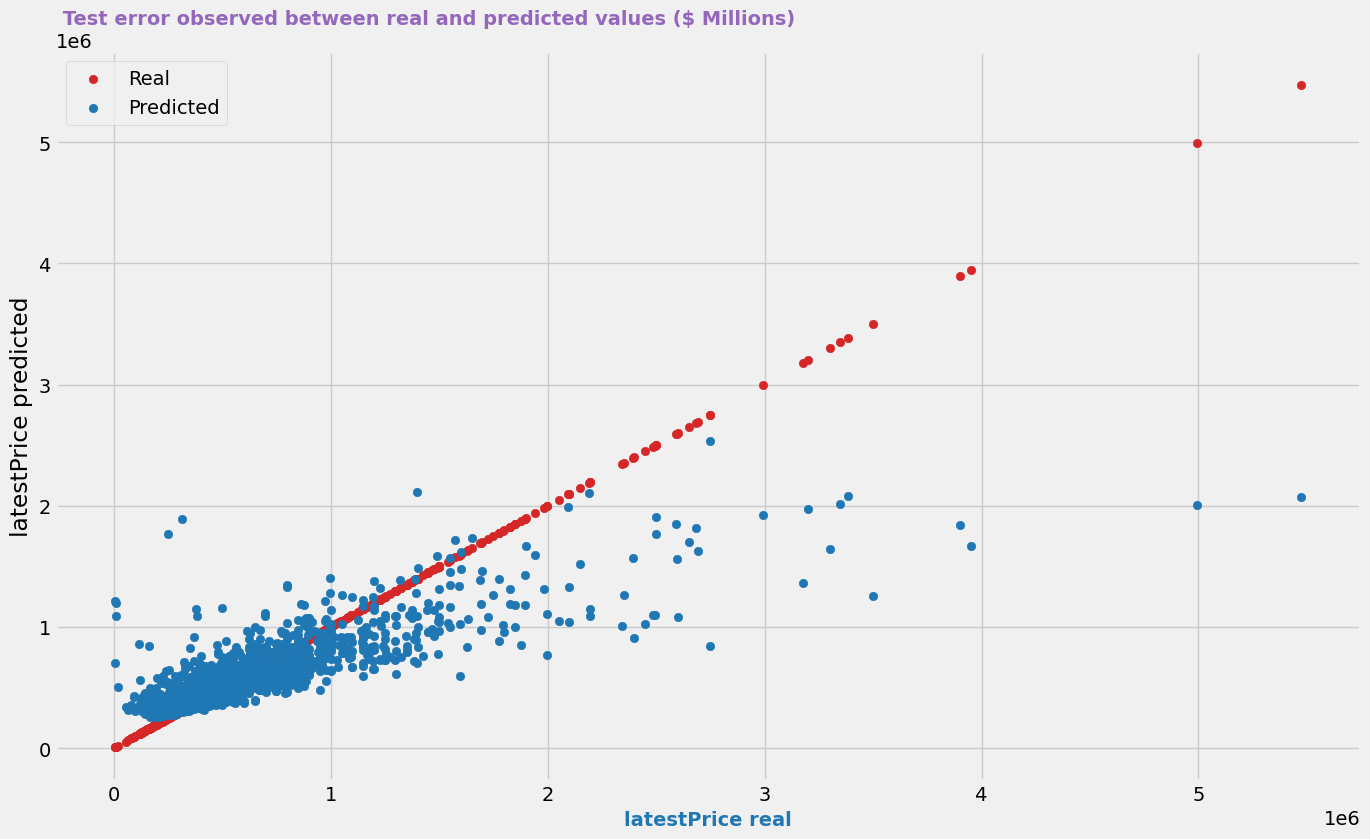

In [114]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice real", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice predicted")
ax.set_title(' Test error observed between real and predicted values ($ Millions)', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()